In [2]:
import imutils
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
#have list of images path
from glob import glob 
data_dir = 'data'
img_fns = glob(data_dir + '/*')
#print(img_fns)

# Get fonction with easy_ocr best parameters

(-0.5, 1023.5, 767.5, -0.5)

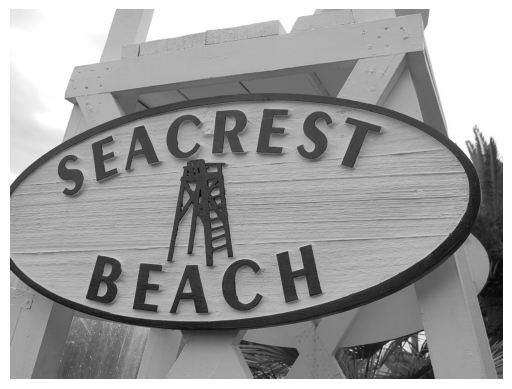

In [3]:
img = cv2.imread(data_dir + '/image002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
#edged = cv2.Canny(bfilter, 30, 200) #Edge detection
#ok = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
#plt.imshow(ok)

In [5]:
reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(bfilter, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(bfilter, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch
result_3 = reader.readtext(img) # img de base
print(result_1)
print('----------------------------------------------------')
print('----------------------------------------------------')
print(result_2)
print('----------------------------------------------------')
print('----------------------------------------------------')
print(result_3)

Using CPU. Note: This module is much faster with a GPU.


[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]
----------------------------------------------------
----------------------------------------------------
[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]
----------------------------------------------------
----------------------------------------------------
[([[69, 154], [799, 154], [799, 412], [69, 412]], 'SiAcREST', 0.1171727379524335

# Determine background color

In [6]:

from colorthief import ColorThief


def is_background_darkened(img_path):
    ct = ColorThief(img_path)
    dominent_color = ct.get_color(quality=1)
    #print(dominent_color)
    #plt.imshow([dominent_color])
    #plt.show()

    # Convertir la couleur en niveaux de gris
    gray = np.dot(dominent_color[0:3], [0.299, 0.587, 0.114])

    # Déterminer si la couleur du background est claire ou foncée
    if gray > 128:
        print(gray)
        return False

    else:
        print(gray)
        return True
  

path = 'data/image080.jpg'
result = is_background_darkened(path)
print(result)

127.71799999999999
True


# IF BACKGROUND NOT DARKENED

In [7]:
def process_not_darkened_background(img_path):
    # Lire l'image
    img = cv2.imread(img_path)
    
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Appliquer le seuillage
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Inverser les couleurs
    inverted = cv2.bitwise_not(thresh)
    
    # Afficher l'image résultante
    #plt.imshow(inverted)
    return(inverted)

In [8]:
img_path = 'test/image002.jpg'

img_with_not_dk_fn = process_not_darkened_background(img_path)

reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(img_with_not_dk_fn, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(bfilter, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch

Using CPU. Note: This module is much faster with a GPU.


In [9]:
print(result_1)
print(result_2)

[([[153, 485], [663, 485], [663, 656], [153, 656]], 'BEACH', 0.9662760083506136), ([[82.1877241839707, 223.1891589613832], [764.8215060290512, 162.06401422000542], [764.8122758160293, 338.8108410386168], [82.17849397094881, 400.9359857799946]], 'SEACREST', 0.8574665000589388)]
[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]


# IF BACKGROUND DARKENED

In [10]:
def process_background_darkened(img_path):
    # Charger l'image
    img = cv2.imread(img_path)
        
    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # Appliquer le seuillage inversé
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
        
    # Inverser les couleurs
    invertedd = cv2.bitwise_not(thresh)
        
    # Afficher l'image originale et l'image inversée
    #cv2.imshow('Original Image', img)
    #plt.imshow(invertedd)
    return invertedd

In [11]:
img_path = 'test/image001.jpg'

img_with_dk_fn = process_background_darkened(img_path)

reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(img_with_dk_fn, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(img_with_dk_fn, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch

print(result_1)
print('-----------------------------------------------------------------------')
print(result_2)

Using CPU. Note: This module is much faster with a GPU.


[([[224, 119], [365, 119], [365, 179], [224, 179]], '<ONALDO', 0.11039348333943613)]
-----------------------------------------------------------------------
[([[224, 119], [365, 119], [365, 179], [224, 179]], '<ONALDO', 0.11039348333943613)]


# Fonction to dertermine low contrast

In [12]:
def is_low_contrast(img_path):
    # load image as YUV (or YCbCR) and select Y (intensity)
    # or convert to grayscale, which should be the same.
    # Alternately, use L (luminance) from LAB.
    img = cv2.imread(img_path)
    Y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]
    
    # compute min and max of Y
    min = np.min(Y)
    max = np.max(Y)
    
    # compute contrast
    contrast = (max-min)/(max+min)
    if contrast < 0.5 :
        return True 
    else :
        return False

    #print(min,max,contrast)
    #plt.imshow(img)
        
#img_path = 'test/low2.png'
#print(is_low_contrast(img_path))

# IF LOW CONTRAST

In [13]:
def ajust_low_contrast(img_path):
    #imgo = cv2.imread('test/low2.png')
    
    # Charger l'image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Appliquer l'égalisation d'histogramme
    img_equalized = cv2.equalizeHist(img)
    '''
    # Afficher les images d'origine et égalisée côte à côte
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(imgo)
    axs[0].set_title('Original Image')
    axs[1].imshow(img_equalized, cmap='gray')
    axs[1].set_title('Equalized Image')
    plt.show()
    '''
    return img_equalized

# IF saturation

In [14]:
#fonction to get saturation
import os
def get_saturation(img_path):
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    saturation = img_hsv[:, :, 1].mean()
    return saturation                         

In [15]:
def ajust_hight_saturation(img_path):
    tab = []
    # Charger l'image
    img = cv2.imread(img_path)
    
    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tab.append(gray_image)
    # Afficher l'image en niveaux de gris
    #plt.imshow(gray_image)
    
    cv2.imwrite('img_to_process/gray_image.png', gray_image)
    tab.append('img_to_process/gray_image.png')
    return tab

In [16]:
img_path = 'data/image034.jpg'

img = cv2.imread(img_path)
new_img = ajust_hight_saturation(img_path)[0]
best = process_background_darkened(ajust_hight_saturation(img_path)[1])
reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(img, decoder='beamsearch') #img de base 
result_2 = reader.readtext(new_img, decoder='beamsearch')# img en appliquant un filtre pour saturation
result_3 = reader.readtext(best, decoder='beamsearch')# img en appliquant un filtre pour saturation + background foncé
print(result_1)
print('-----------------------------------------------------------------------')
print(result_2)
print('-----------------------------------------------------------------------')
print(result_3)

Using CPU. Note: This module is much faster with a GPU.


[([[170, 107], [833, 107], [833, 366], [170, 366]], 'Aa', 0.1312248979864348), ([[323.2696491545933, 623.0222461353302], [547.9990930885779, 714.8524701669437], [505.7303508454067, 810.9777538646698], [280.0009069114221, 718.1475298330563]], 'VIL', 0.5219869338103615)]
-----------------------------------------------------------------------
[([[150, 97], [849, 97], [849, 394], [150, 394]], 'E34', 0.15355699163659503), ([[419, 282], [634, 282], [634, 466], [419, 466]], ')', 0.28017991649562646), ([[571, 665], [701, 665], [701, 757], [571, 757]], 'V', 0.3086855176693213), ([[316.20878658414273, 620.024099979941], [552.9772117108424, 706.2306000961951], [511.79121341585727, 809.975900020059], [274.0227882891576, 722.7693999038049]], 'YIL', 0.24670862017404038)]
-----------------------------------------------------------------------
[([[370, 260], [690, 260], [690, 584], [370, 584]], '25', 0.23072350460766472), ([[192.39182312430967, 169.5672924972387], [683.8938085887314, 85.30521815297796

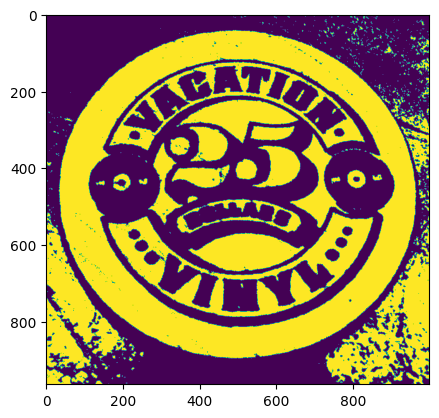

In [17]:
img_path = 'img_to_process/gray_image.png'

result_img = process_background_darkened(img_path)

plt.imshow(result_img)



# Get a rational threshold of saturation

In [18]:
import os
import math

def get_threshold_saturation(data_dir):
    saturation_values = []
    #data_dir = 'data'
    image_exts = ['jpeg', 'jpg', 'bmp', 'png']
    
    for image in os.listdir(data_dir):
        if image.lower().split('.')[-1] in image_exts:
            image_path = os.path.join(data_dir, image)
            img = cv2.imread(image_path)
                
            if img is not None:
                img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                saturation = img_hsv[:, :, 1].mean()
                saturation_values.append(saturation)
            else:
                print(f"Failed to read {image_path}")
    # Calcul de la moyenne
    mean_saturation = sum(saturation_values) / len(saturation_values)

    # Calcul de l'écart-type
    std_saturation = math.sqrt(sum([(x - mean_saturation) ** 2 for x in saturation_values]) / len(saturation_values))

    # Définition du seuil
    threshold = mean_saturation + std_saturation
    return threshold


In [19]:
#apply fonction to get saturation against 5 dataset
dataset = ['data','data1','data2','data3','data4']
sat = []
for data in dataset:
    sat.append(get_threshold_saturation(data))

#the average of these return will be our threshold
threshold_saturation = sum(sat) / len(sat)
print(threshold_saturation)

127.22668998032418


# Main Fonction improve image

In [20]:
#fonction who apply filters to image in repertory, create,and stocke this image and in other repertory 

def improve_image(img_path):
    # Extract file name of img_path
    file_name = os.path.basename(img_path)
    # build new file name with result before the extension
    file_name_result = file_name.split('.')[0] + '_result.png'
    # build new path
    new_img_path = os.path.join('img_to_process', file_name_result)
    
    if get_saturation(img_path) > 127.23:
        if is_background_darkened(img_path):
            img = process_background_darkened(img_path)
            cv2.imwrite(new_img_path, img)
        else : 
            img = process_not_darkened_background(img_path)
            cv2.imwrite(new_img_path, img)
    else : 
        if is_low_contrast(img_path):
            img = ajust_low_contrast(img_path)
            cv2.imwrite(new_img_path, img)
        else :
            if is_background_darkened(img_path):
                img = process_background_darkened(img_path)
                cv2.imwrite(new_img_path, img)
            else : 
                img = process_not_darkened_background(img_path)
                cv2.imwrite(new_img_path, img) 

Using CPU. Note: This module is much faster with a GPU.


37.184999999999995
[([[41, 25], [529, 25], [529, 63], [41, 63]], 'TUTORIAL FORBEGINNERS', 0.946425727304151), ([[556, 28], [1008, 28], [1008, 60], [556, 60]], 'COMPLEX COFFEE MUG PART', 0.7659614904240364), ([[42, 64], [468, 64], [468, 94], [42, 94]], 'MODELING IN SOLIDWORKS:', 0.5078682800112327), ([[99, 147], [147, 147], [147, 167], [99, 167]], '0120', 0.999311089515686), ([[315, 149], [359, 149], [359, 167], [315, 167]], '0114', 0.934369683265686), ([[707, 229], [779, 229], [779, 247], [707, 247]], 'R3 FILLET', 0.998645380145052), ([[707, 245], [815, 245], [815, 265], [707, 265]], 'ALL AROUND', 0.8542176411412369), ([[361, 321], [385, 321], [385, 339], [361, 339]], 'R5', 0.6902843618827604), ([[223, 413], [255, 413], [255, 433], [223, 433]], '120', 0.9930214729737091), ([[371, 423], [393, 423], [393, 441], [371, 441]], 'R2', 0.9984226394896163), ([[395, 455], [451, 455], [451, 475], [395, 475]], 'R22.50', 0.999861199583328), ([[161, 463], [245, 463], [245, 525], [161, 525]], 'But', 

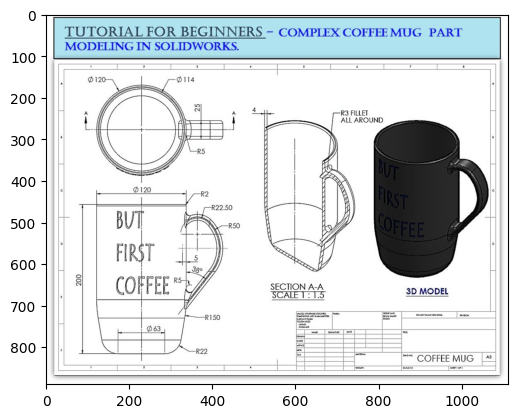

In [21]:
reader = easyocr.Reader(['en'], gpu=False)
img_pathhh = 'test/de2.jpg'
improve_image(img_pathhh)

img_path_result = 'img_to_process/de2_result.png'


imggg = cv2.imread(img_pathhh)
img2 = cv2.imread(img_path_result)
result = reader.readtext(imggg)
result2 = reader.readtext(img2)


plt.imshow(imggg)
print(result)
print("--------------------")
print(result2)   

    

In [22]:
# Créer deux listes vides
liste1 = []
liste2 = []

# Ajouter les mots de result à la première liste
for mot in result:
    liste1.append(mot[1])

# Ajouter les mots de result2 à la deuxième liste
for mot in result2:
    liste2.append(mot[1])

# Afficher les deux listes
print(liste1)
print("--------------------")
print(liste2)

['TUTORIAL FORBEGINNERS', 'COMPLEX COFFEE MUG PART', 'MODELING IN SOLIDWORKS:', '0120', '0114', 'R3 FILLET', 'ALL AROUND', 'R5', '120', 'R2', 'R22.50', 'But', 'Rso', 'FIRST', '389', 'RS', 'COFFEE', 'SECTION', '3D MODEL', 'SCAELLS', 'Caentaeoreee', '-RISO', 'R22', 'COFFEE MUG', 'HuT', 'arst', 'COFFEE', 'A-A']
--------------------
['TUTORIAL FOR BEGINNERS', 'COMPLEX COFFFE MUG', 'PART', 'MODELING IN SOLIWORKS', '120', '114', 'R3 FILLET', 'ALL AROUND', 'R5', '0120', 'R22,50', 'BUT', 'Rso', 'FIRST', '390', 'R5', 'COFFEE', 'SECTIONA-A', '3D MODEL', 'SCATE', 'EaueekIGFr', 'Oeira-eatt', 'RISO', ';RR4I', 'LNR+', '0.63_', 'Txtn', 'R22', 'COFFEE MUG', 'KLE"#', "40T49'"]


# Complete img_to_process with filtrated image

In [23]:
'''
import os

# répertoire contenant les images à traiter
data_dir = 'data'

# boucle sur chaque fichier dans le répertoire
for file in os.listdir(data_dir):
    # vérifier que le fichier est une image (extension .png ou .jpg)
    if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):
        # construire le chemin complet du fichier
        file_path = os.path.join(data_dir, file)
        # appeler la fonction improve_image() pour améliorer l'image
        improve_image(file_path) 
'''   

"\nimport os\n\n# répertoire contenant les images à traiter\ndata_dir = 'data'\n\n# boucle sur chaque fichier dans le répertoire\nfor file in os.listdir(data_dir):\n    # vérifier que le fichier est une image (extension .png ou .jpg)\n    if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg'):\n        # construire le chemin complet du fichier\n        file_path = os.path.join(data_dir, file)\n        # appeler la fonction improve_image() pour améliorer l'image\n        improve_image(file_path) \n"

# Function to keep best ocr result  

Using CPU. Note: This module is much faster with a GPU.
100% |########################################################################|


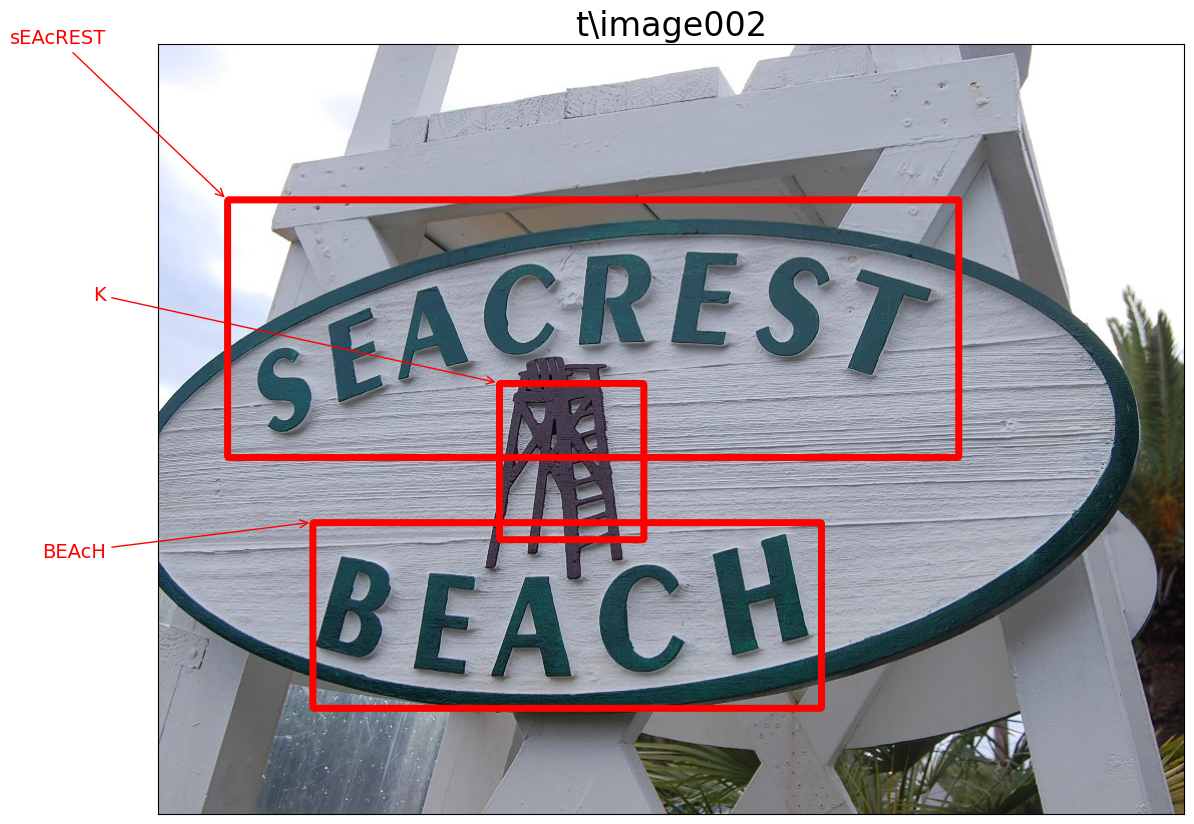

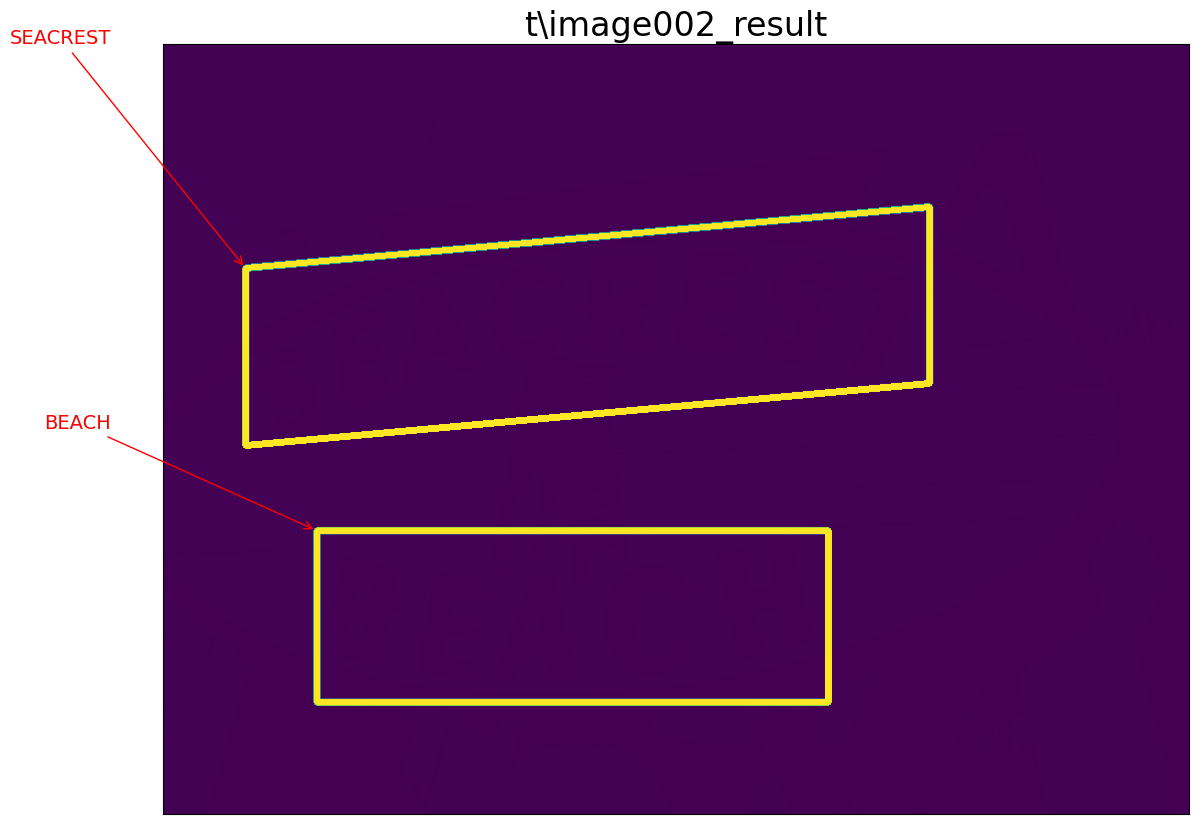

In [16]:
import pandas as pd
import numpy as np 

from glob import glob 
from tqdm.notebook import tqdm 

import matplotlib.pyplot as plt 
from progressbar import ProgressBar


data_dir = 't'

img_fns = glob(data_dir + '/*')
#print(img_fns)

img_id = img_fns[0].split('\\')[-1].split('.')[0]

#img = plt.imread(img_fns[0]); plt.imshow(img); plt.axis('off'); plt.show()


reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage

dfs = []
pbar = ProgressBar()
for img in pbar(img_fns):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)


def plot(img_fn, easyocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, ax = plt.subplots(figsize=(15, 10))  # Create one sub trame

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=ax) #color=(0, 255, 0) #line_thickness=1 # Affiche l'image et les résultats de reconnaissance de texte dans la sous-trame
    ax.set_title(img_id, fontsize=24)
    
    plt.show()


for img_fn in img_fns:
    plot(img_fn, easyocr_df)  